In [1]:
import sys
sys.path.append('/Users/gbibim/Here/hpt')

# List all modules and packages available at this path
import os
print(os.listdir('/Users/gbibim/Here/hpt'))


['outparquet', '.DS_Store', 'LICENSE', 'requirements.txt', 'ZJets.ipynb', 'pyproject.toml', 'README.md', '.gitignore', 'print_parquet.py', 'outfiles', '.git', 'data', 'mSDplot.ipynb', 'src']


In [94]:

from hpt import utils

#import mplhep as hep
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import mplhep as hep

import hist

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

In [3]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [21]:
import pandas as pd

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet('/Users/gbibim/Here/genZ/data/2023/ZZ/parquet/out_0.parquet')
df.columns

MultiIndex([(                                       'ak8FatJetEta', 0),
            (                                       'ak8FatJetEta', 1),
            (                                       'ak8FatJetPhi', 0),
            (                                       'ak8FatJetPhi', 1),
            (                                      'ak8FatJetMass', 0),
            (                                      'ak8FatJetMass', 1),
            (                                        'ak8FatJetPt', 0),
            (                                        'ak8FatJetPt', 1),
            (                                 'ak8FatJetmsoftdrop', 0),
            (                                 'ak8FatJetmsoftdrop', 1),
            (                                  'ak8FatJetPNetTXbb', 0),
            (                                  'ak8FatJetPNetTXbb', 1),
            (                                  'ak8FatJetPNetTXjj', 0),
            (                                  'ak8FatJetPNetTXj

In [46]:
# Handling the directories

MAIN_DIR = "/Users/gbibim/Here/genZ/"
dir_name = "data"  # data for older samples new for the files with lhe variables
path_to_dir = f"{MAIN_DIR}/{dir_name}/"
year = "2023"  

In [195]:
# Define the samples stucture
samples = {
    "data": {
        "JetMET_Run2023Cv1",
        "JetMET_Run2023Cv2",
        "JetMET_Run2023Cv3",
        "JetMET_Run2023Cv4",
    },
    "Diboson": {
        "ZZ",
        "WZ",
        "WW",
        "WWto4Q",       
    },
    "TT": {
        "TTto4Q",
        "TTto2L2Nu",
        "TTtoLNu2Q",
    },
    "Zto2QNLO": {
        "Zto2Q-2Jets_PTQQ-100to200_1J",
        "Zto2Q-2Jets_PTQQ-100to200_2J",
        "Zto2Q-2Jets_PTQQ-200to400_1J",
        "Zto2Q-2Jets_PTQQ-200to400_2J",
        "Zto2Q-2Jets_PTQQ-400to600_1J",
        "Zto2Q-2Jets_PTQQ-400to600_2J",
        "Zto2Q-2Jets_PTQQ-600_1J",
        "Zto2Q-2Jets_PTQQ-600_2J",
    },
    "Wto2QNLO": {
        "Wto2Q-2Jets_PTQQ-100to200_1J",
        "Wto2Q-2Jets_PTQQ-100to200_2J",
        "Wto2Q-2Jets_PTQQ-200to400_1J",
        "Wto2Q-2Jets_PTQQ-200to400_2J",
        "Wto2Q-2Jets_PTQQ-400to600_1J",
        "Wto2Q-2Jets_PTQQ-400to600_2J",
        "Wto2Q-2Jets_PTQQ-600_1J",
        "Wto2Q-2Jets_PTQQ-600_2J",
    },
    "QCD": {
        "QCD_HT-40to70",
        "QCD_HT-70to100",
        "QCD_HT-100to200",
        "QCD_HT-200to400",
        "QCD_HT-400to600",
        "QCD_HT-600to800",
        "QCD_HT-800to1000",
        "QCD_HT-1000to1200",
        "QCD_HT-1200to1500",
        "QCD_HT-1500to2000",
    }

    
}

In [196]:
# Dir dict and columns to be loaded

dirs = {path_to_dir: samples}

load_columns = [
    ("weight", 1),
    ("ak8FatJetmsoftdrop", 2),
    #("ak8FatJetPNetMass", 2),
    ("ak8FatJetPNetTXbb", 2),
    ("ak8FatJetPNetTXjj", 2),
]

In [197]:
events_dict = {}

# Loop through Zto2Q and ZtoNuNu
for process, sample_list in samples.items():
    events_dict[process] = {}

    for input_dir, dirs_samples in dirs.items():
        events_dict[process] = {
            **events_dict[process],
            **utils.load_samples(
                input_dir,
                process,
                sample_list,
                year,
                columns=utils.format_columns(load_columns),
            ),
        }

sample_name JetMET_Run2023Cv1
Loading JetMET_Run2023Cv1
Loaded JetMET_Run2023Cv1                                 : 23051745 entries
sample_name JetMET_Run2023Cv2
Loading JetMET_Run2023Cv2
Loaded JetMET_Run2023Cv2                                 : 6896268 entries
sample_name JetMET_Run2023Cv4
Loading JetMET_Run2023Cv4
Loaded JetMET_Run2023Cv4                                 : 48193191 entries
sample_name JetMET_Run2023Cv3
Loading JetMET_Run2023Cv3
Loaded JetMET_Run2023Cv3                                 : 7514289 entries
sample_name WW
Loading WWto4Q
Loaded WWto4Q                                            : 734289 entries
Loading WW
Loaded WW                                                : 187939 entries
sample_name WZ
Loading WZ
Loaded WZ                                                : 130647 entries
sample_name ZZ
Loading ZZ
Loaded ZZ                                                : 18883 entries
sample_name WWto4Q
Loading WWto4Q
Loaded WWto4Q                                       

In [154]:
events_dict["Zto2QNLO"]["Zto2Q-2Jets_PTQQ-600_1J"]["ak8FatJetPNetTXbb"]

,0,1
0,0.082092,0.003832
1,0.003075,0.039154
2,0.465820,0.473145
3,0.348145,0.118591
4,0.823242,0.753906
...,...,...
1035410,0.008240,0.991211
1035411,0.996094,-99999.000000
1035412,0.000444,0.000343
1035413,0.035004,0.000299


In [119]:
events_dict["Zto2QNLO"]["Zto2Q-2Jets_PTQQ-600_1J"]["finalWeight"].sum()

1527.500362748481

In [120]:
events_dict["data"]["JetMET_Run2023Cv1"]["finalWeight"].sum()

23051745.0

In [214]:
sample_axis = hist.axis.StrCategory([], name="name", growth=True)  #samples
msd_axis = hist.axis.Regular(80, 40, 120, name="msd", label="mSD [GeV]")
proc_axis = hist.axis.StrCategory([], name="process", growth=True)  #processes

In [218]:
import correctionlib
from pathlib import Path
import math
import numpy as np

h_msd = hist.Hist(msd_axis, proc_axis, sample_axis)

for process, events in events_dict.items():
    print (process)
    for sample in events:
        weight = events[sample]["finalWeight"]
        msd = events[sample]["ak8FatJetmsoftdrop"][0]
        Pnet_xbb = events[sample]["ak8FatJetPNetTXbb"][0]
        Pnet_xjj = events[sample]["ak8FatJetPNetTXjj"][0]

        selection = (Pnet_xjj > 0.7) & ((msd > 40) & (msd <100))
        
        h_msd.fill(msd[selection], process, sample, weight=weight[selection])


data
Diboson
TT
Zto2QNLO
Wto2QNLO
QCD


In [207]:
h_msd.axes

(Regular(80, 0, 200, name='msd', label='mSD [GeV]'),
 StrCategory(['data', 'Diboson', 'TT', 'Zto2QNLO', 'Wto2QNLO', 'QCD'], growth=True, name='process'),
 StrCategory(['JetMET_Run2023Cv1', 'JetMET_Run2023Cv2', 'JetMET_Run2023Cv4', 'JetMET_Run2023Cv3', 'WW', 'WZ', 'ZZ', 'WWto4Q', 'TTto2L2Nu', 'TTto4Q', 'TTtoLNu2Q', 'Zto2Q-2Jets_PTQQ-200to400_1J', 'Zto2Q-2Jets_PTQQ-400to600_1J', 'Zto2Q-2Jets_PTQQ-200to400_2J', 'Zto2Q-2Jets_PTQQ-400to600_2J', 'Zto2Q-2Jets_PTQQ-600_2J', 'Zto2Q-2Jets_PTQQ-100to200_1J', 'Zto2Q-2Jets_PTQQ-600_1J', 'Zto2Q-2Jets_PTQQ-100to200_2J', 'Wto2Q-2Jets_PTQQ-400to600_1J', 'Wto2Q-2Jets_PTQQ-600_1J', 'Wto2Q-2Jets_PTQQ-400to600_2J', 'Wto2Q-2Jets_PTQQ-200to400_1J', 'Wto2Q-2Jets_PTQQ-200to400_2J', 'Wto2Q-2Jets_PTQQ-600_2J', 'Wto2Q-2Jets_PTQQ-100to200_2J', 'Wto2Q-2Jets_PTQQ-100to200_1J', 'QCD_HT-40to70', 'QCD_HT-1500to2000', 'QCD_HT-1200to1500', 'QCD_HT-1000to1200', 'QCD_HT-400to600', 'QCD_HT-200to400', 'QCD_HT-800to1000', 'QCD_HT-600to800'], growth=True, name='name'))

In [101]:
def plot_h(hists, legend, density, title):
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))

    hep.histplot(hists, ax=ax, label=legend, density=density)
    ax.legend(fontsize=8)
    ax.set_yscale("log")
    if density:
        ax.set_ylabel("Density")
    else:
        ax.set_ylabel("Events")
    ax.set_title(title)
    ax.xaxis.grid(True, which="major")
    ax.yaxis.grid(True, which="major")

In [222]:
# Histos dictionary


hists = {}
individual_hists = {}
#legend = {}
lumi = 17650/1000
energy = "13.6 TeV"
for process, sample_list in events_dict.items():
    #zto = "Zto2Q" or "Zto2Nu"
    individual_hists[process] = {}
    #hists[process] = sum([h for h in h_msd[{"name": sample}]
    for sample, events in sample_list.items():
        try:
            individual_hists[process][sample] = h_msd[{"process": process, "name": sample}]
        except:
            print(f"KeyError: '{sample}' not found in the histogram axes.")
            continue
            
    hists[process]= sum([h for h in individual_hists[process].values()])
    #legend[process] = process
        




KeyError: 'QCD_HT-40to70' not found in the histogram axes.
KeyError: 'QCD_HT-100to200' not found in the histogram axes.
KeyError: 'QCD_HT-70to100' not found in the histogram axes.


In [201]:
hists

{'data': Hist(Regular(80, 0, 200, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 1415164.0 (1462112.0 with flow),
 'Diboson': Hist(Regular(80, 0, 200, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 2888.7990288230208 (2908.750876530312 with flow),
 'TT': Hist(Regular(80, 0, 200, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 20177.78812550332 (20399.123913706073 with flow),
 'Zto2QNLO': Hist(Regular(80, 0, 200, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 34554.90827124474 (35197.61254408912 with flow),
 'Wto2QNLO': Hist(Regular(80, 0, 200, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 192044.81559983312 (195779.69251957515 with flow),
 'QCD': Hist(Regular(80, 0, 200, name='msd', label='mSD [GeV]'), storage=Double()) # Sum: 1924048.7957115388 (1973266.9526972543 with flow)}

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

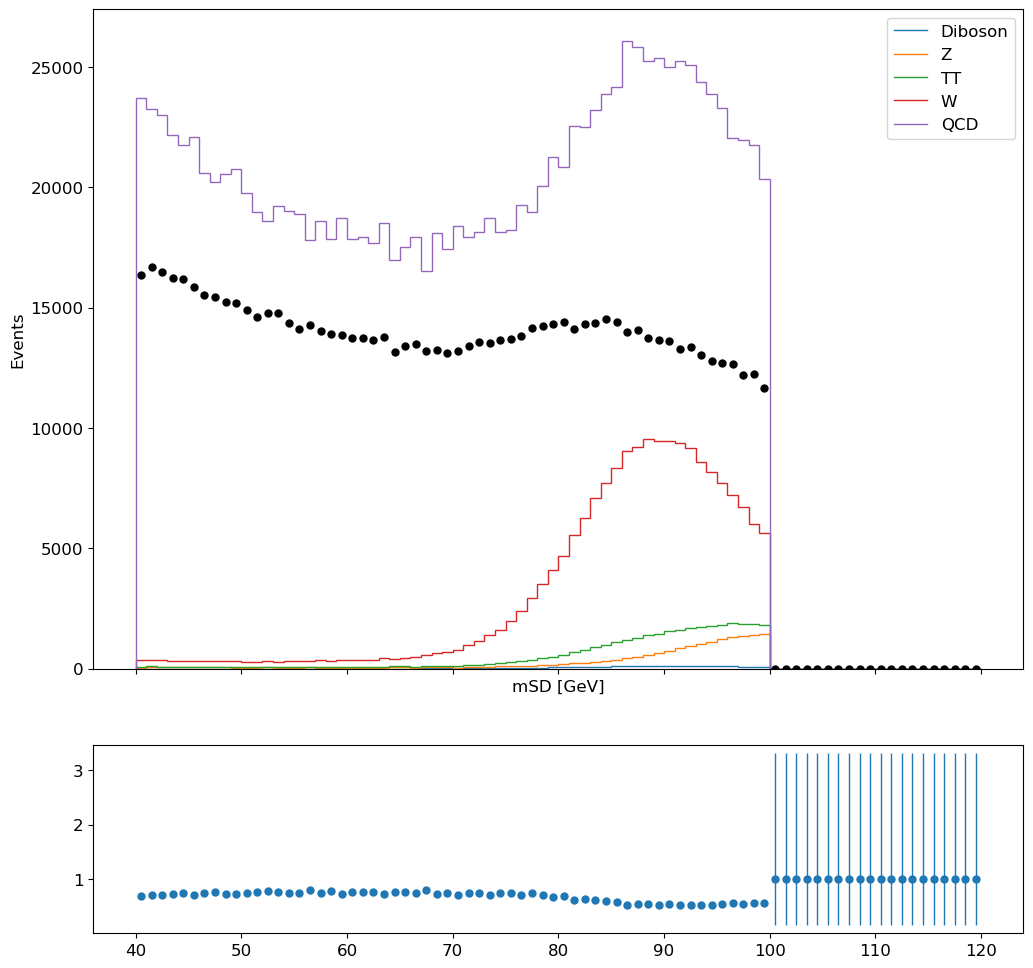

In [223]:

from hist.intervals import ratio_uncertainty

h_z = hists["Zto2QNLO"]
h_w = hists["Wto2QNLO"]
h_qcd = hists["QCD"]
h_diboson = hists["Diboson"]
h_tt = hists["TT"]

h_data = hists["data"]
h = [h_z, h_w, h_qcd, h_diboson, h_tt]
legends = ["Z", "W", "QCD", "Diboson", "TT"]
#labels = ["z", "w"]

fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot(h, ax=ax, stack=True, sort="yield", label=legends) ##h_qcd, h_diboson, h_tt
# plot Data
hep.histplot(h_data, ax=ax, histtype="errorbar", color="black")
ax.legend()
# 2nd panel
bg_total = sum(h) ## , h_qcd, h_diboson, h_tt
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_data.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar")

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

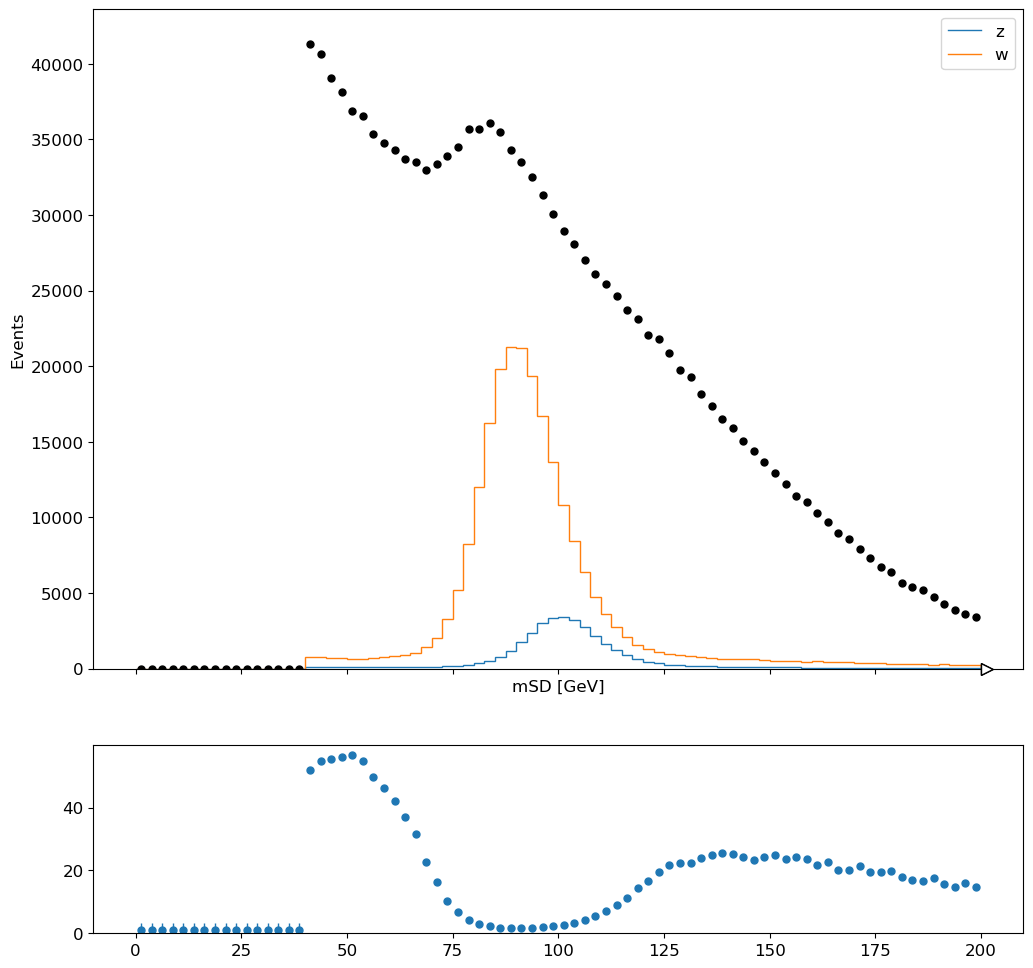

In [191]:

from hist.intervals import ratio_uncertainty

h_z = hists["Zto2QNLO"]
h_w = hists["Wto2QNLO"]

h_data = hists["data"]
labels = ["z", "w"]

fig, (ax, rax) = plt.subplots(
            2,
            1,
            figsize=(12, 12),
            gridspec_kw={"height_ratios": [3.5, 1], "hspace": 0.18},
            sharex=True,
        )
# 1st panel
ax.set_ylabel("Events")

#ax.set_yscale("log")
# plot MC
hep.histplot([h_z, h_w ], ax=ax, stack=True, sort="yield", label=labels) ##h_qcd, h_diboson, h_tt
# plot Data
hep.histplot(h_data, ax=ax, histtype="errorbar", color="black")
ax.legend()
# 2nd panel
bg_total = sum([h_z, h_w]) ## , h_qcd, h_diboson, h_tt
tot_val = bg_total.values()
tot_val_zero_mask = tot_val == 0
tot_val[tot_val_zero_mask] = 1
data_val = h_data.values()
data_val[tot_val_zero_mask] = 1
yerr = ratio_uncertainty(data_val, tot_val, "poisson")
yvalue = data_val / tot_val

hep.histplot(yvalue, bg_total.axes[0].edges, yerr=yerr, ax=rax, histtype="errorbar")

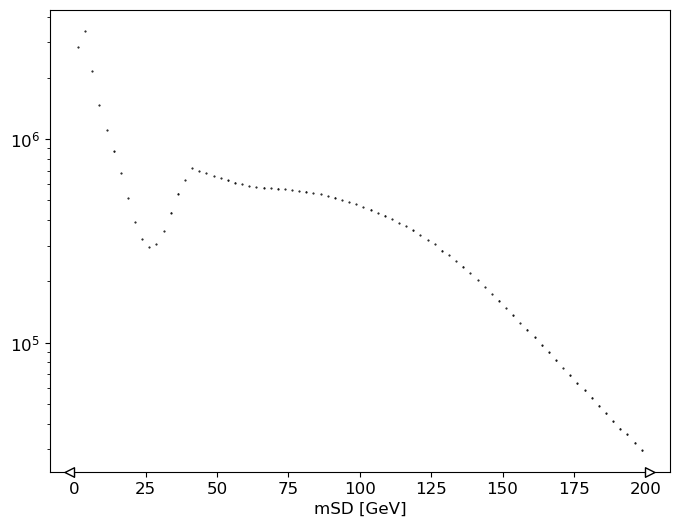

In [142]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
hep.histplot(h_data, ax=ax, yerr=True, histtype="errorbar", markersize=1, color="black")
ax.set_yscale("log")